<a href="https://colab.research.google.com/github/manuelncsu/Bacterial-WGS-bioinformatics-workshop/blob/main/Day_2/Bioinformatics_course_Day_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

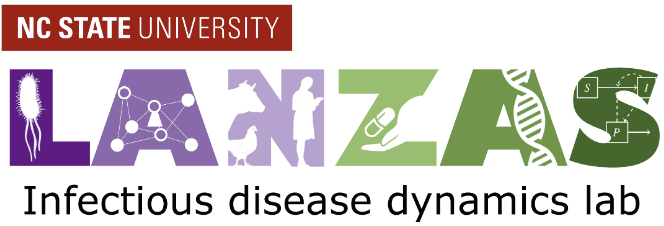

# **Bacterial WGS bioinformatics workshop**
## **Day 2 - Part 2.** Downloading and processing WGS using Bactopia pipeline

##**Step 1:** Mounting your google drive into google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


##Lets go to the workshop main folder

In [ ]:
cd /content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_2/Part_2

/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_2/Part_2


##Install Conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


## And some necessary packages

In [ ]:
!conda install pandas numpy matplotlib

In [ ]:
!pip install biopython

In [ ]:
!conda install -c biocore hmmer

In [ ]:
!conda install bioconda::bbmap

In [ ]:
!conda install bioconda::prodigal

## Lets create a virtual environment

In [ ]:
!python --version

Python 3.10.10


In [ ]:
# install virtual environment package
!pip install virtualenv

In [ ]:
# create virtual environment
!virtualenv busco

In [ ]:
# Lets check our new virtual environment
!ls

bin    busco_18964.log	CHANGELOG  CONTRIBUTING.md  LICENSE    scripts	 src	    tests
build  BUSCO.egg-info	config	   dist		    README.md  setup.py  test_data


In [ ]:
#Activate the environment
!source busco/bin/activate

In [ ]:
cd busco

/content/busco/busco


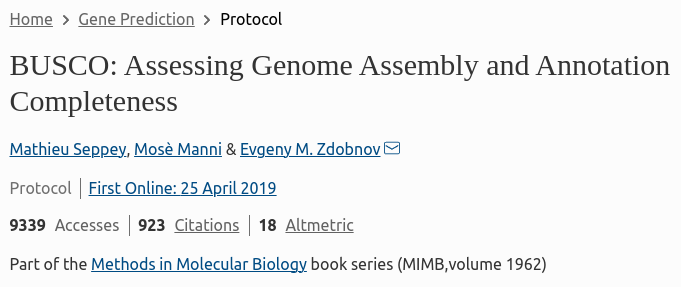

## Link to the article: https://link.springer.com/protocol/10.1007/978-1-4939-9173-0_14

## Install BUSCO inside our virtual environment

In [ ]:
ls

bin/       config/           LICENSE*   scripts/   src/        tests/
CHANGELOG  CONTRIBUTING.md*  README.md  setup.py*  test_data/


In [ ]:
!pip install git+https://gitlab.com/ezlab/busco.git

  Cloning https://gitlab.com/ezlab/busco.git to /tmp/pip-req-build-l61bq6y7
  Running command git clone --filter=blob:none --quiet https://gitlab.com/ezlab/busco.git /tmp/pip-req-build-l61bq6y7
  Resolved https://gitlab.com/ezlab/busco.git to commit d3b3f5348c7379c646f48d7640b259357a41432c
  Preparing metadata (setup.py) ... done


In [ ]:
!busco --version

BUSCO 5.6.1


## Lets check the genome completeness of 10 genome assemblies of *C. difficile*

### All the assemblies files are located in Day_2/Part_2/Assemblies

In [ ]:
import os

# Set the input folder containing .fna files
input_folder = "/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_2/Part_2/Assemblies"

# Set the output folder for BUSCO results
output_folder = "/busco_results"

# Set the lineage database
lineage = "bacteria_odb10"  # You can change this to match your analysis

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through .fna files in the input folder
for fna_file in os.listdir(input_folder):
    if fna_file.endswith(".fna"):
        # Extract the filename without extension
        filename_noext = os.path.splitext(fna_file)[0]

        # Run BUSCO for each .fna file
        !busco -m genome -i "{os.path.join(input_folder, fna_file)}" -o "{os.path.join(output_folder, filename_noext)}" -l "$lineage" -f



# Lets check one of the results generated with BUSCO

In [ ]:
cd content/busco_results

/content/busco_results


In [ ]:
ls

SRX2195078/  SRX2195080/  SRX2195082/  SRX2195085/  SRX2195087/
SRX2195079/  SRX2195081/  SRX2195083/  SRX2195086/  SRX2195088/


## Open one of the genome completeness files

In [ ]:
# Define the path to your file
file_path = 'SRX2195078/short_summary.specific.bacteria_odb10.SRX2195078.txt'

# Open and read the file
with open(file_path, 'r') as file:
    content = file.read()

# Print the content
print(content)

# BUSCO version is: 5.6.1 
# The lineage dataset is: bacteria_odb10 (Creation date: 2024-01-08, number of genomes: 4085, number of BUSCOs: 124)
# Summarized benchmarking in BUSCO notation for file /content/gdrive/Shareddrives/Workshop Manuel & Alba/Day_2/Part_2/Assemblies/SRX2195078.fna
# BUSCO was run in mode: prok_genome_prod
# Gene predictor used: prodigal

	***** Results: *****

	C:98.4%[S:96.8%,D:1.6%],F:1.6%,M:0.0%,n:124	   
	122	Complete BUSCOs (C)			   
	120	Complete and single-copy BUSCOs (S)	   
	2	Complete and duplicated BUSCOs (D)	   
	2	Fragmented BUSCOs (F)			   
	0	Missing BUSCOs (M)			   
	124	Total BUSCO groups searched		   

Assembly Statistics:


Dependencies and versions:
	hmmsearch: 3.1
	bbtools: 38.18
	prodigal: 2.6.3
	busco: 5.6.1



## Lets extract all the BUSCO results and put them in one file

In [ ]:
%%bash

# Create the CSV header
echo "AccessionNumber,C,S,D,F,M" > result.csv

# Search for files matching the pattern and process them
for file in /content/busco_results/*/short_summary*txt; do
    # Extract the AccessionNumber from the filename
    accession=$(awk '{print $1}' <<< "$(basename "$file")")

    # Extract the values using grep and awk
    c=$(grep -oP '\bC:\K\d+' "$file")
    s=$(grep -oP '\bS:\K\d+' "$file")
    d=$(grep -oP '\bD:\K\d+' "$file")
    f=$(grep -oP '\bF:\K\d+' "$file")
    m=$(grep -oP '\bM:\K\d+' "$file")

    # Append the values to the CSV file
    echo "$accession,$c,$s,$d,$f,$m" >> result.csv
done

## To open the merged file

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('result.csv')

# Display the DataFrame
df

,AccessionNumber,C,S,D,F,M
0,short_summary.specific.bacteria_odb10.SRX21950...,98,96,1,1,0
1,short_summary.specific.bacteria_odb10.SRX21950...,98,96,1,1,0
2,short_summary.specific.bacteria_odb10.SRX21950...,98,96,1,1,0
3,short_summary.specific.bacteria_odb10.SRX21950...,98,96,1,1,0
4,short_summary.specific.bacteria_odb10.SRX21950...,98,96,1,1,0
5,short_summary.specific.bacteria_odb10.SRX21950...,98,96,1,1,0
6,short_summary.specific.bacteria_odb10.SRX21950...,98,96,1,1,0
7,short_summary.specific.bacteria_odb10.SRX21950...,98,96,1,1,0
8,short_summary.specific.bacteria_odb10.SRX21950...,98,96,1,1,0
9,short_summary.specific.bacteria_odb10.SRX21950...,98,96,1,1,0


## Lets move the busco_results folder to your course folder the Google Drive

In [ ]:
ls

busco/           busco_36552.log  busco_downloads/  gdrive/
busco_34618.log  busco_39365.log  busco_results/    sample_data/


In [ ]:
import shutil

# Source and destination paths
source_path = '/content/busco_results'
destination_path = '/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_2/Part_2/'

# Move the folder
shutil.move(source_path, destination_path)

'/content/gdrive/Shareddrives/Workshop Manuel & Alba/Day_2/Part_2/busco_results/busco_results'

# Finally, this code will be useful to quickly remove a non-empty directory

In [ ]:
# Go back one folder to remove the virtual "busco" folder
!cd ..

In [ ]:
ls

gdrive/  sample_data/


In [ ]:
import shutil

# Replace 'your_directory' with the actual path of the directory you want to delete
directory_path = 'busco_downloads'

# Delete the directory and its contents
shutil.rmtree(directory_path)